In [270]:
#loading libraries
import os
import math
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

%matplotlib inline


In [271]:
train = pd.read_csv("train.csv")

In [272]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [273]:
# removing columns which are not required for the model training based on the first glance
# Name : I have removed this because this would not be required to check the survivabiltity
# Similarily the Passengerid & ticket number would not be an impact
col_drop_int = ["PassengerId","Name","Ticket"]
train = train.drop(columns=col_drop_int)

<AxesSubplot:>

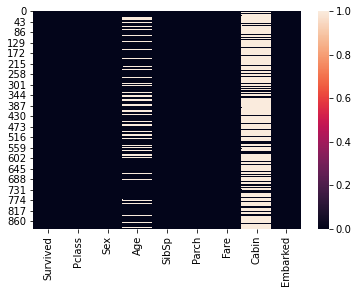

In [274]:
sns.heatmap(data = train.isnull())

In [275]:
cabin_missing = train["Cabin"].isnull().sum()/len(train["Cabin"])*100
age_missing = train["Age"].isnull().sum()/len(train["Age"])*100
print(cabin_missing)
print(age_missing)

77.10437710437711
19.865319865319865


In [276]:
# based on the heatmap, I found that the given the cabin has a lot of null value in terms of percentage it was at 77
# thus I am droping the cabin column also

In [277]:
train = train.drop(columns="Cabin",axis=1)

In [278]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<AxesSubplot:xlabel='Age', ylabel='Count'>

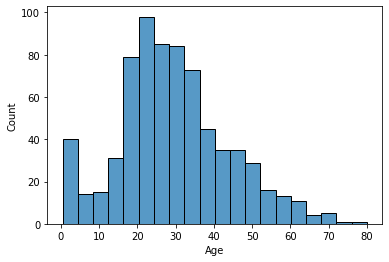

In [279]:
#correct age with mean method but before I need to check the data via histogram plot
sns.histplot(data = train["Age"])

In [280]:
train["Age"].fillna(value= train["Age"].mean(),inplace=True)

<AxesSubplot:>

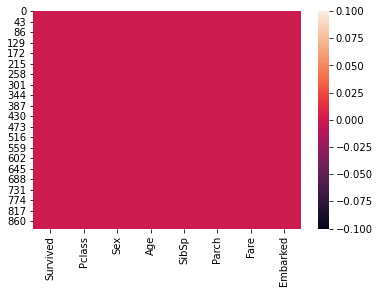

In [281]:
sns.heatmap(data = train.isnull())

In [282]:
train["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [283]:
##checking null values in embarked

In [284]:
train[train["Embarked"].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [285]:
#train["Embarked"].fillna("S",inplace=True)
#train["Embarked"].dropna(inplace=True,axis=0)
#train["Embarked"]=train[train["Embarked"].isnull()]

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

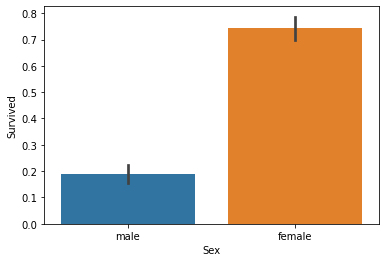

In [286]:
sns.barplot(x = train["Sex"],y=train["Survived"],data = train)

In [287]:
#checking the survival with children or parched on board

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

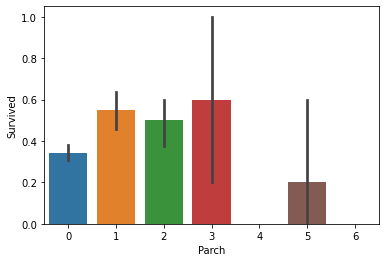

In [288]:
sns.barplot(x = train["Parch"],y=train["Survived"],data = train)

In [289]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [290]:
sex = pd.get_dummies(data = train["Sex"],drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [291]:
embark = pd.get_dummies(data = train["Embarked"],drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [292]:
train = pd.concat([train,sex,embark],axis=1)

In [293]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [294]:
#droping the embarked and sex col
col_drop = ["Sex","Embarked"]
col_drop

['Sex', 'Embarked']

In [295]:
cols = ["Pclass","Age","SibSp","Parch","Fare","male","Q","S"]

In [296]:
train.drop(columns=col_drop,inplace=True)

In [297]:
#finaly the data is ready for model building


In [298]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [299]:
Logmodel = LogisticRegression()
rd = RandomForestClassifier()
dt = DecisionTreeClassifier()
gb = GaussianNB()

In [300]:
X = train.drop(columns="Survived")
y = train["Survived"]

In [301]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     891 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
 5   male    891 non-null    uint8  
 6   Q       891 non-null    uint8  
 7   S       891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 37.5 KB


In [302]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 70)

In [303]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 8)
(223, 8)
(668,)
(223,)


In [304]:
Logmodel.fit(X_train,y_train)

C:\Users\nagariya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [305]:
y_pred = Logmodel.predict(X_test)

In [306]:
print(accuracy_score(y_test,y_pred))

0.8340807174887892


In [307]:
cm = confusion_matrix

In [308]:
print(cm(y_test,y_pred))

[[119  12]
 [ 25  67]]


In [309]:
claf = classification_report

In [310]:
print(claf(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       131
           1       0.85      0.73      0.78        92

    accuracy                           0.83       223
   macro avg       0.84      0.82      0.82       223
weighted avg       0.84      0.83      0.83       223



In [311]:
rd.fit(X_train,y_train)

RandomForestClassifier()

In [312]:
y_pred_rd = rd.predict(X_test)

In [313]:
print(accuracy_score(y_test,y_pred_rd))

0.8116591928251121


In [314]:
print(cm(y_test,y_pred_rd))
print("______________________________________________________________________")
print("                                          ")
print(claf(y_test,y_pred_rd))

[[119  12]
 [ 30  62]]
______________________________________________________________________
                                          
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       131
           1       0.84      0.67      0.75        92

    accuracy                           0.81       223
   macro avg       0.82      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223



In [315]:
gb.fit(X_train,y_train)

GaussianNB()

In [316]:
y_pred_gb = gb.predict(X_test)

In [317]:
print(accuracy_score(y_test,y_pred_gb))

0.8161434977578476


In [318]:
print(cm(y_test,y_pred_gb))
print("______________________________________________________________________")
print("                                          ")
print(claf(y_test,y_pred_gb))

[[115  16]
 [ 25  67]]
______________________________________________________________________
                                          
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       131
           1       0.81      0.73      0.77        92

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.82      0.82      0.81       223



In [326]:
#testing this output on the test dataset

test = pd.read_csv("test.csv")

In [327]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [332]:
col_drop_test = ["PassengerId","Name","Ticket","Cabin"]

In [334]:
test = test.drop(columns=col_drop_test)

In [336]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [342]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [341]:
test["Fare"].fillna(value = test["Fare"].mean(),inplace = True)
test["Age"].fillna(value = test["Age"].mean(),inplace = True)

In [343]:
embark_test = pd.get_dummies(data = test["Embarked"],drop_first=True)
embark_test

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
413,0,1
414,0,0
415,0,1
416,0,1


In [344]:
sex_test = pd.get_dummies(data = test["Sex"],drop_first=True)
sex_test

,male
0,1
1,0
2,1
3,1
4,0
...,...
413,1
414,0
415,1
416,1


In [345]:
test = pd.concat([test,sex_test,embark_test],axis=1)

In [346]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,3,male,34.50000,0,0,7.8292,Q,1,1,0
1,3,female,47.00000,1,0,7.0000,S,0,0,1
2,2,male,62.00000,0,0,9.6875,Q,1,1,0
3,3,male,27.00000,0,0,8.6625,S,1,0,1
4,3,female,22.00000,1,1,12.2875,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S,1,0,1
414,1,female,39.00000,0,0,108.9000,C,0,0,0
415,3,male,38.50000,0,0,7.2500,S,1,0,1
416,3,male,30.27259,0,0,8.0500,S,1,0,1


In [349]:
test.drop(columns= col_drop,inplace=True)

In [350]:
pred = Logmodel.predict(test)

In [352]:
final = pd.DataFrame()

In [354]:
test_new = pd.read_csv("test.csv")

In [355]:
final["PassengerId"] = test_new["PassengerId"]

In [356]:
final["predict"] = pred

In [359]:
final.to_csv("output.csv")